# Overview



## Imports/Settings

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import os

import glob
import holidays
from holidays import country_holidays

import itertools

plt.rcParams['figure.figsize']=(12,3)

In [4]:
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

## Functions

In [46]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

## Data Prep

### Concat all csv into 1 DF

In [6]:
# Define the directory where your CSV files are located
csv_directory = 'Data/ZipData/'

# List all CSV files in the directory
csv_files = [os.path.join(csv_directory, filename) for filename in os.listdir(csv_directory) if filename.endswith('.csv')]

In [15]:
# Create an empty list to hold the DataFrames
dfs = []

# Loop through your CSV files and read them into DataFrames
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

# Concatenate the DataFrames into one
concatenated_df = pd.concat(dfs, ignore_index=True)



In [16]:
concatenated_df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,12149675,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,41.751612,-87.671958
1,11574022,01/01/2019 01:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,1834,18.0,42.0,41.892659,-87.616600
2,11559315,01/01/2019 01:00:00 PM,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,True,1022,10.0,24.0,41.862529,-87.703930
3,11553582,01/01/2019 01:00:00 AM,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974
4,12339426,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,824,8.0,16.0,NaN,NaN


In [17]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB


### Set index as DateTime

In [18]:
# Convert our Date to Datetime dtype
concatenated_df['Date'] = pd.to_datetime(concatenated_df['Date'], format = '%m/%d/%Y %H:%M:%S %p')
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 603.2+ MB


In [20]:
# Set the DateTime as the index
concatenated_df = concatenated_df.set_index(['Date'])
concatenated_df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2019-01-01 01:00:00,12149675,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,41.751612,-87.671958
2019-01-01 01:00:00,11574022,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,1834,18.0,42.0,41.892659,-87.616600
2019-01-01 01:00:00,11559315,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,True,1022,10.0,24.0,41.862529,-87.703930
2019-01-01 01:00:00,11553582,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974
2019-01-01 01:00:00,12339426,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,824,8.0,16.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2003-12-31 12:50:12,3116762,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1423,14.0,26.0,41.905026,-87.692003
2003-12-31 12:55:00,3121312,MOTOR VEHICLE THEFT,"ATT: TRUCK, BUS, MOTOR HOME",STREET,False,False,1131,11.0,24.0,41.875043,-87.743319
2003-12-31 12:55:00,3112374,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,STREET,False,False,2234,22.0,34.0,41.684928,-87.653656


In [21]:
# Organize our Dataframe by Time // Index
concatenated_df = concatenated_df.sort_index()
concatenated_df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,3206463,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095
2001-01-01 01:00:00,1314713,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,41.899521,-87.672220
2001-01-01 01:00:00,1317937,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877
2001-01-01 01:00:00,3212105,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.0,14.0,41.823730,-87.698440
2001-01-01 01:00:00,1310824,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 12:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


### Save as CSV

In [22]:
#Removed due to file to large to commit. Stored locally for future use.

#concatenated_df.to_csv('Chicago_combined_data.csv', index=False)

In [23]:
# Create a copy of the DF to use for analysis
crime_df = concatenated_df.copy()

# Business Analysis // Stakeholder Questions

## Topic 1: Comparing Police Districs

- Which District had the most crimes in 2022?
- Which had the least?

In [38]:
df_1 = crime_df.loc['2022']
df_1.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2022-01-01 01:00:00,12606858,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,621,6.0,17.0,41.757732,-87.644528
2022-01-01 01:00:00,12582058,ASSAULT,AGGRAVATED - HANDGUN,RESIDENCE,False,False,1412,14.0,35.0,41.933254,-87.713132
2022-01-01 01:00:00,12582776,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,APARTMENT,False,True,2432,24.0,49.0,42.003582,-87.660816
2022-01-01 01:00:00,12582793,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1831,18.0,42.0,41.889453,-87.627995
2022-01-01 01:00:00,12582216,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,RESIDENCE,False,True,1031,10.0,22.0,41.841722,-87.723261


In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238858 entries, 2022-01-01 01:00:00 to 2022-12-31 12:59:00
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    238858 non-null  int64  
 1   Primary Type          238858 non-null  object 
 2   Description           238858 non-null  object 
 3   Location Description  238011 non-null  object 
 4   Arrest                238858 non-null  bool   
 5   Domestic              238858 non-null  bool   
 6   Beat                  238858 non-null  int64  
 7   District              238858 non-null  float64
 8   Ward                  238848 non-null  float64
 9   Latitude              233085 non-null  float64
 10  Longitude             233085 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 18.7+ MB


In [39]:
#Seperate out our key features
df_1 = df_1['District']

#Count by District
count = df_1.value_counts()
count

8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
Name: District, dtype: int64

Text(0, 0.5, 'Crimes')

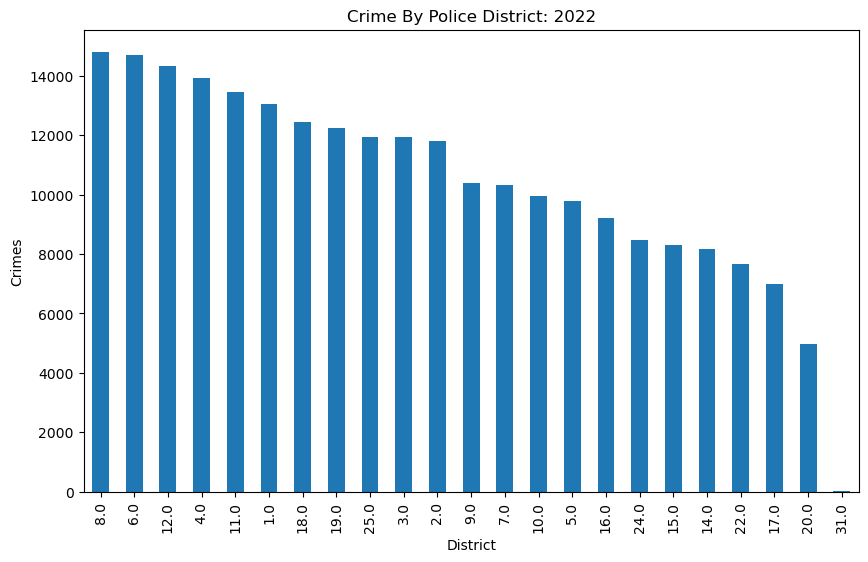

In [42]:
plt.figure(figsize=(10, 6))  # Set the figure size
count.plot(kind='bar')
plt.title('Crime By Police District: 2022')
plt.xlabel('District')
plt.ylabel('Crimes')

### Answer:

The distrct with the Most crimes in 2022: District 8

The distrct with the Least crimes in 2022: Distrct 31

## Topic 2: Crimes Across the Years

- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [43]:
df_2 = crime_df[['Primary Type']]
df_2

,Primary Type
Date,
2001-01-01 01:00:00,CRIM SEXUAL ASSAULT
2001-01-01 01:00:00,ASSAULT
2001-01-01 01:00:00,BATTERY
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN
2001-01-01 01:00:00,THEFT
...,...
2022-12-31 12:50:00,ASSAULT
2022-12-31 12:50:00,ASSAULT
2022-12-31 12:52:00,BATTERY


In [44]:
# Resample by Year
df_2_annual = df_2.resample('A').count().copy()
df_2_annual

,Primary Type
Date,
2001-12-31,485886
2002-12-31,486807
2003-12-31,475985
2004-12-31,469422
2005-12-31,453773
2006-12-31,448179
2007-12-31,437087
2008-12-31,427183
2009-12-31,392827


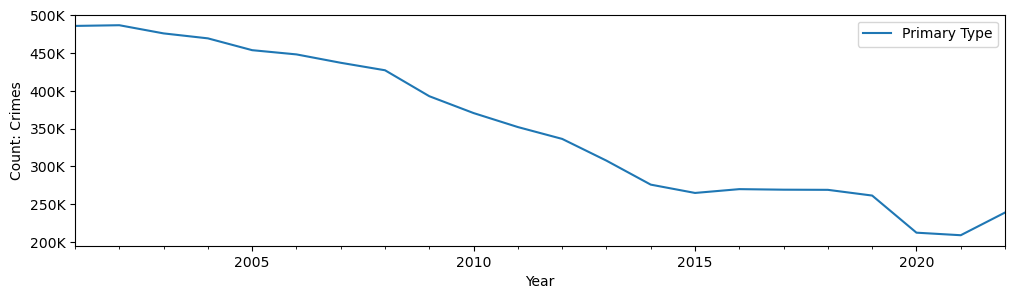

In [47]:
ax = df_2_annual.plot()
ax.set_ylabel('Count: Crimes')
ax.set_xlabel('Year')
ax.yaxis.set_major_formatter(fmt_thous)

In [48]:
type_df = df_2.groupby('Primary Type').resample('A').count()
type_df

Primary Type
Primary Type      Date                    
ARSON             2001-12-31          1011
                  2002-12-31          1032
                  2003-12-31           955
                  2004-12-31           778
                  2005-12-31           691
...                                    ...
WEAPONS VIOLATION 2018-12-31          5456
                  2019-12-31          6339
                  2020-12-31          8432
                  2021-12-31          8980
                  2022-12-31          8766

[723 rows x 1 columns]

In [49]:
type_by_year = type_df.unstack(level=0)
type_by_year.columns

MultiIndex([('Primary Type',                             'ARSON'),
            ('Primary Type',                           'ASSAULT'),
            ('Primary Type',                           'BATTERY'),
            ('Primary Type',                          'BURGLARY'),
            ('Primary Type', 'CONCEALED CARRY LICENSE VIOLATION'),
            ('Primary Type',               'CRIM SEXUAL ASSAULT'),
            ('Primary Type',                   'CRIMINAL DAMAGE'),
            ('Primary Type',           'CRIMINAL SEXUAL ASSAULT'),
            ('Primary Type',                 'CRIMINAL TRESPASS'),
            ('Primary Type',                'DECEPTIVE PRACTICE'),
            ('Primary Type',                 'DOMESTIC VIOLENCE'),
            ('Primary Type',                          'GAMBLING'),
            ('Primary Type',                          'HOMICIDE'),
            ('Primary Type',                 'HUMAN TRAFFICKING'),
            ('Primary Type',  'INTERFERENCE WITH PUBLIC OFFICE

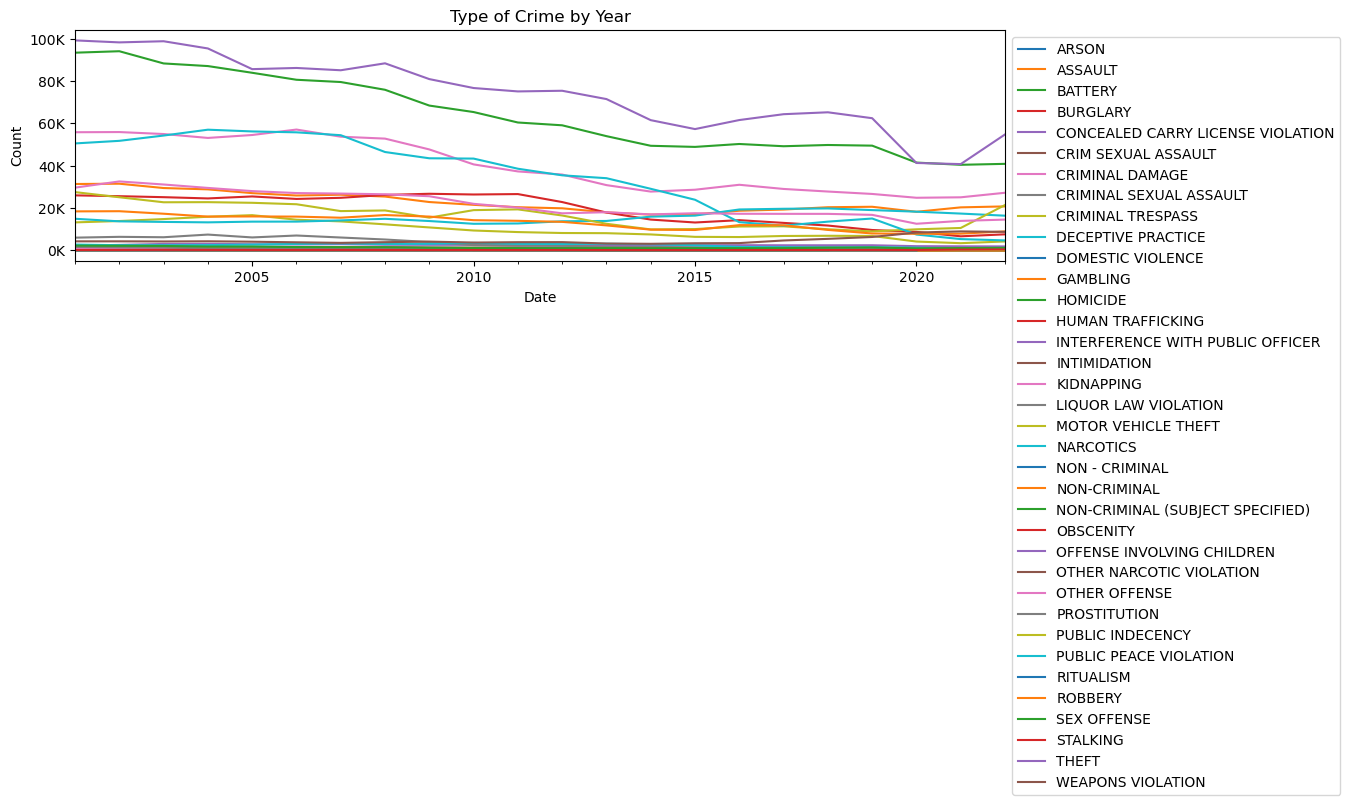

In [62]:
ax = type_by_year['Primary Type'].plot()
ax.set_title('Type of Crime by Year')
ax.set_ylabel('Count')
ax.yaxis.set_major_formatter(fmt_thous)
plt.legend(bbox_to_anchor = (1,1));

### Answer

It appears that Crime overall is decreasing according to our data and first visual.

In our second visual, we can see that nearly all of the crime is on a decrease. But the Concealed Carry License Violation and Criminal Trespass are both on the rise again.

## Topic 4) Comparing Months

In [163]:
df_3 = crime_df.copy()
df_3.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,3206463,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095
2001-01-01 01:00:00,1314713,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,41.899521,-87.672220
2001-01-01 01:00:00,1317937,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877
2001-01-01 01:00:00,3212105,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.0,14.0,41.823730,-87.698440
2001-01-01 01:00:00,1310824,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836


In [165]:
df_3['Month'] = df_3.index.month
df_3['Month'].value_counts()

7     717232
8     710444
5     682932
6     681739
10    676285
9     668242
3     629704
4     627175
11    608961
1     601236
12    579768
2     529391
Name: Month, dtype: int64

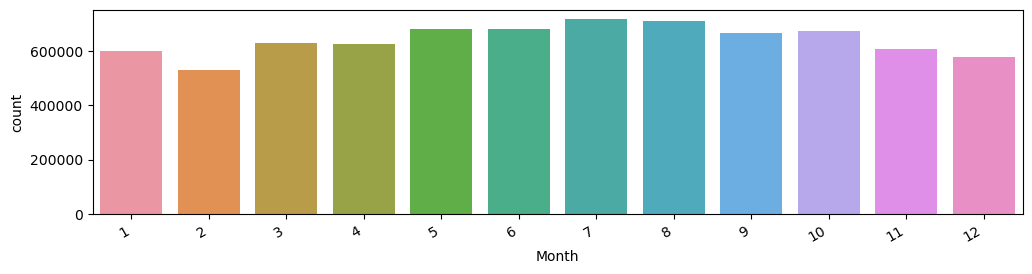

In [167]:
ax = sns.countplot (data = df_3, x=('Month'))
fig = ax.get_figure()
fig.autofmt_xdate()

In [168]:
monthly_crime = df_3.groupby('Primary Type')['Month'].value_counts().sort_index()
monthly_crime

Primary Type       Month
ARSON              1         917
                   2         807
                   3        1111
                   4        1097
                   5        1230
                            ... 
WEAPONS VIOLATION  8        9887
                   9        9435
                   10       9190
                   11       7952
                   12       7401
Name: Month, Length: 415, dtype: int64

In [178]:
unstacked = monthly_crime.unstack(level=0)

In [179]:
unstacked.columns

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

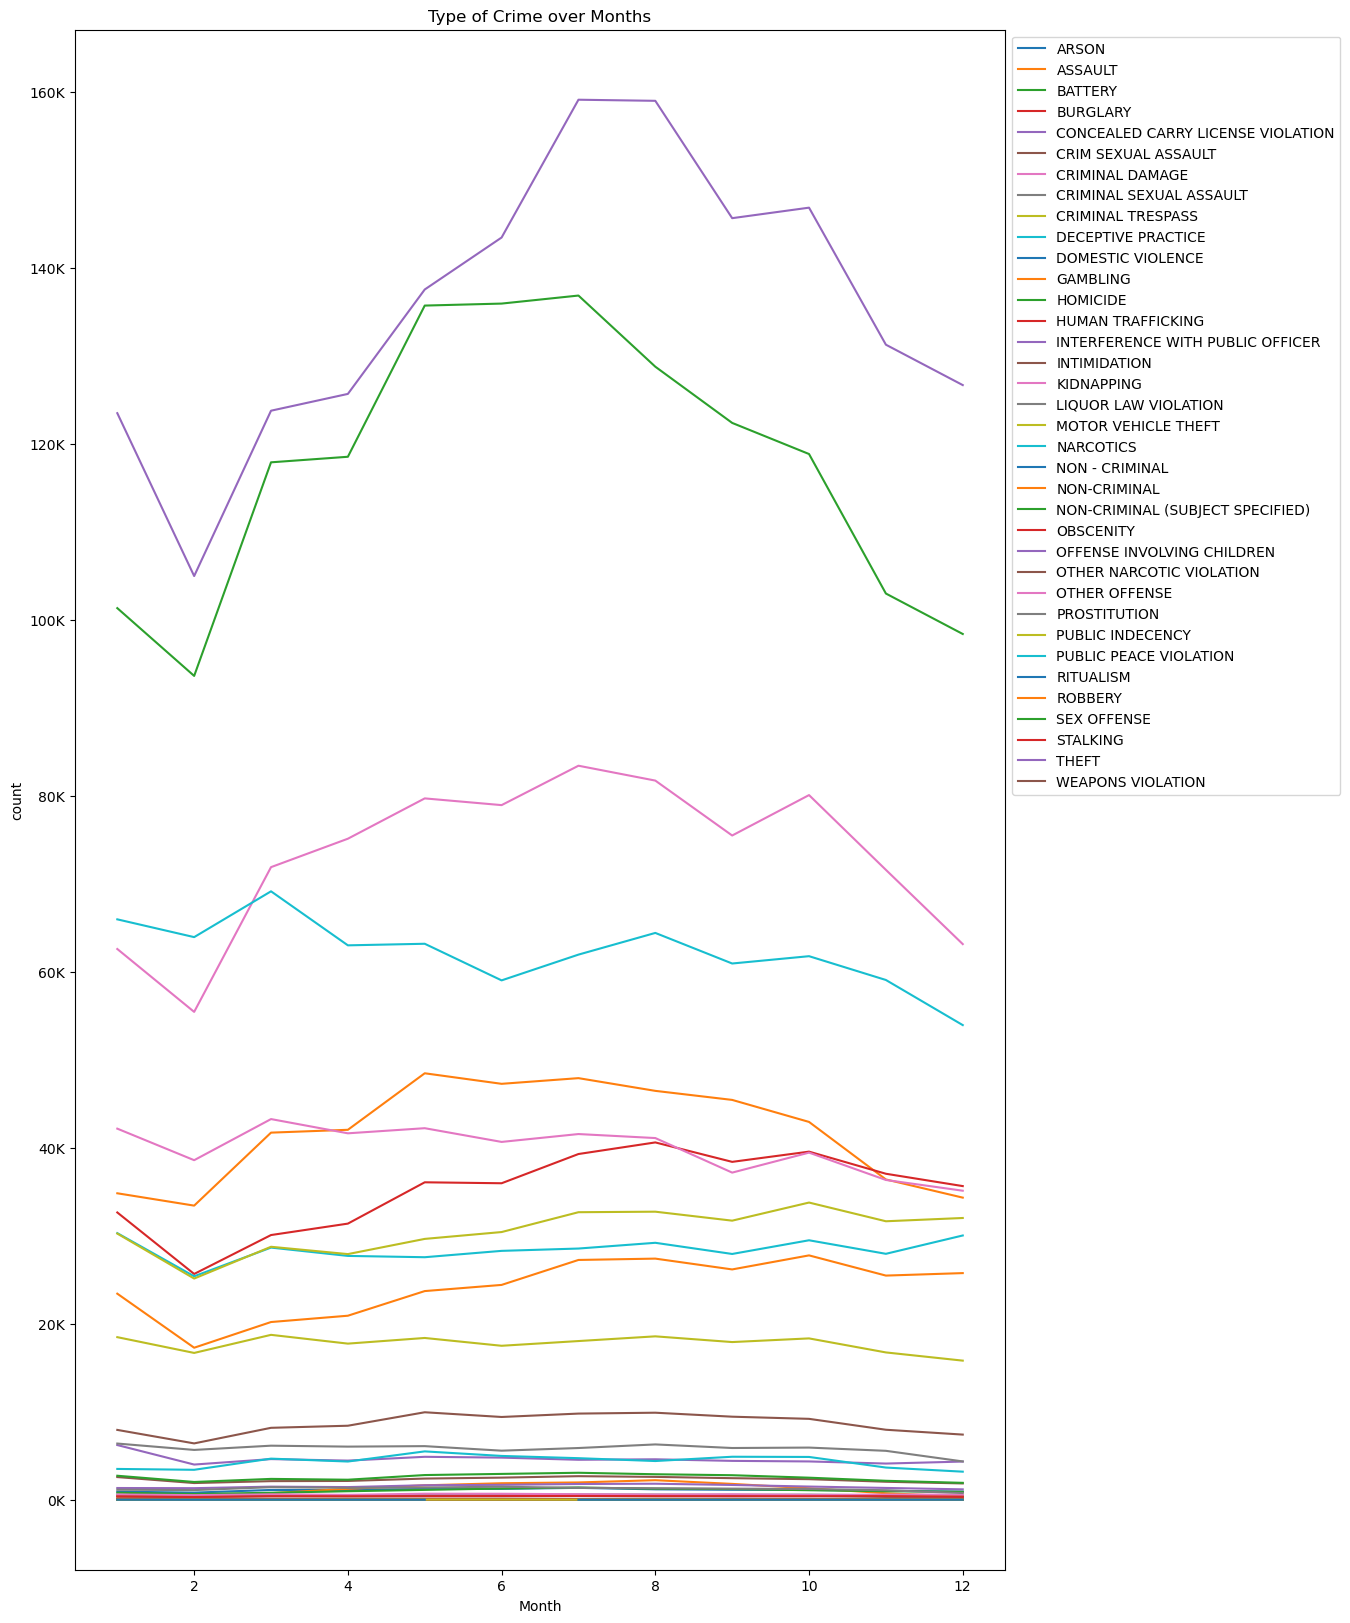

In [184]:
ax = unstacked.plot(figsize = (12,20))
ax.set_title('Type of Crime over Months')
ax.set_ylabel('count')
ax.yaxis.set_major_formatter(fmt_thous)
ax.legend(bbox_to_anchor=[1,1]);

### Answer

It appears from our visualizations that crime has spiked in the months of: July and August

BUT it appears to drop during the months of: November, December and February

WHen split up by type of crime, we see that most follow the patter or display no pattern by month. However, it does appear that Narcotics are higher in January/February and drop off during the summer.